# Q-function for the open harmonic oscillator


Numerical solving of the master equation to find the Q function of an open Harmonic oscillator

In [1]:
import numpy as np
import sympy as sp
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qutip as qt

## Establishing the PDE

The master equation for the open harmonic oscillator takes the form

$$\frac{d\rho}{dt} = \gamma (2a\rho a^\dagger - a a^\dagger \rho - \rho a a^\dagger)$$

Taking the average value over coherent states we obtain a partial differential equation for the Hushimi Q-function yielding

$$\frac{\partial Q(t, a, a^*)}{\partial t} = \gamma \left( \frac{\partial^2}{\partial a \partial a^*} + a \frac{\partial}{\partial a} + a^* \frac{\partial}{\partial a^*} \right) Q(t, a, a^*)$$

Where $Q = \frac{1}{\pi}\langle\alpha|\rho|\alpha\rangle$ is the Hushimi Q-function and $\alpha$ are coherent states. This equation can take the form

$$Q_t = \gamma (2Q_{xy} + xQ_x + yQ_y + 2Q)$$

The $x$ and $y$ variables correspond to coherent states eigenvalues and will here taken to constitute the space of the problem.

## Creating the computational setup
By discretizing we can write the function as a function with discrete outputs

$$t = n\Delta t, \quad x = i\Delta x, \quad y = j\Delta y$$
$$Q(t, x, y) = Q(n\Delta t, i\Delta x, j\Delta y)$$
$$Q(t, x, y) \mapsto Q^n_{i,j}$$

The derivatives can be substituted by their Taylor expansions

$$Q_t = \frac{1}{\Delta t}(Q^{n+1}_{i,j} - Q^n_{i,j}) + O(\Delta t)$$
$$Q_x = \frac{1}{\Delta x}(Q^n_{i+1,j} - Q^n_{i,j}) + O(\Delta x)$$
$$Q_y = \frac{1}{\Delta y}(Q^n_{i,j+1} - Q^n_{i,j}) + O(\Delta y)$$
$$Q_{xx} = \frac{1}{\Delta x^2}(Q^n_{i+1,j} - 2Q^n_{i,j} + Q^n_{i-1,j}) + O(\Delta x^2)$$
$$Q_{yy} = \frac{1}{\Delta y^2}(Q^n_{i,j+1} - 2Q^n_{i,j} + Q^n_{i,j-1}) + O(\Delta y^2)$$
$$Q_{xy} = \frac{1}{\Delta x \Delta y}(Q^n_{i+1,j+1} - Q^n_{i+1,j} - Q^n_{i,j+1} + Q^n_{i,j}) + O(\Delta x, \Delta y)$$

And by substituting these expressions into the PDE we get the FTCS equation.

$$Q^{n+1}_{i,j} = \alpha Q^n_{i,j} + \beta Q^n_{i+1,j} + \gamma Q^n_{i,j+1} + \delta Q^n_{i+1,j+1}$$

Where
$$\alpha = \gamma\Delta t (3 - i - j + \frac{2}{\Delta x \Delta y})$$
$$\beta = \gamma\Delta t (i - \frac{2}{\Delta x \Delta y})$$
$$\gamma = \gamma\Delta t (j - \frac{2}{\Delta x \Delta y})$$
$$\delta = \frac{2\gamma\Delta t}{\Delta x \Delta y}$$

Here we suppose that $Q^0_{i,j} \mapsto Q(0, a, a^*) = \frac{1}{\pi}\langle\alpha|\rho(t=0)|\alpha\rangle$ corresponding to the Hushimi Q-function at initial time is known. This of course stems from the fact that the density matrix of the initial state of the oscillators are known. We will therefore implement the FTCS method.

## Tweaking the parameters

Now in order to establish the way in which we will calculate the function we should at first establish the time steps $\Delta t, \Delta x, \Delta y$


Some (unanswered questions):
- Does the solution converge??
- Is it stable??

### Initial condition
For a fock state $\rho = |m\rangle\langle m|$ with $\alpha = x + iy$ we have:

$$Q_m(0, \alpha, \alpha^*) = \frac{1}{\pi}|\langle\alpha|m\rangle|^2 = \frac{1}{\pi} e^{-\alpha\alpha^*} \frac{(\alpha\alpha^*)^m}{m!}$$



## Performing the calculation

In [2]:
# Define the parameters
dt = 1
dx = 0.5
dy = dx
g = 0.1
dA = 2/(dx*dy)

t_dim = 15
x_dim = 11
y_dim = 5

u = np.zeros((t_dim, y_dim, x_dim)) # (timesteps, N(dx), N(dy)

def hushimi_0(x,y):
    """Define the husimi Q for the first excited state"""
    return 1 /np.pi * np.e ** (-dx**2 *x**2 - dy**2 * y**2)

def hushimi_1(x,y):
    """Define the husimi Q for the first excited state of the harmonic oscillator"""
    return dx**4 /np.pi * np.e ** (-dx**2 *x**2 - dy**2 * y**2) * (x**2 + y**2)

# Make a discretized version of the hushimi Q
for i in range(u.shape[1]):
    for j in range(u.shape[2]):
        u[0,i,j] = hushimi_1(i,j)
u[0,0]

array([0.00000000e+00, 1.54937493e-02, 2.92749158e-02, 1.88716585e-02,
       5.83004893e-03, 9.60129119e-04, 8.83857616e-05, 4.66464740e-06,
       1.43284235e-07, 2.58673480e-09, 2.76291864e-11])

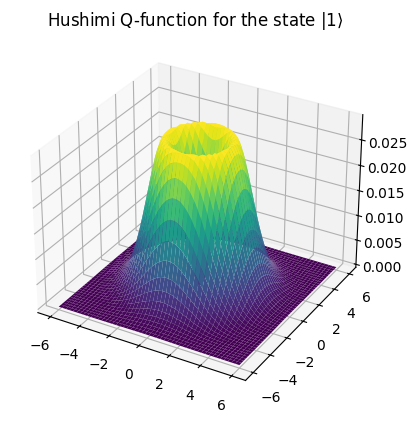

In [3]:
#Plot the actual of the initial state Hushimi
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
X, Y = np.meshgrid(x, y)
Z = hushimi_1(X,Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title(r'Hushimi Q-function for the state $|1 \rangle$')
plt.show()

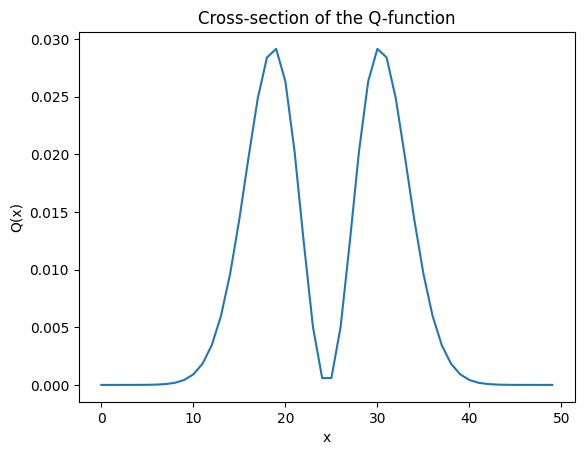

In [4]:
#Crossection of the Hushimi Q
plt.plot(hushimi_1(x,y))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.title('Cross-section of the Q-function')
plt.show()

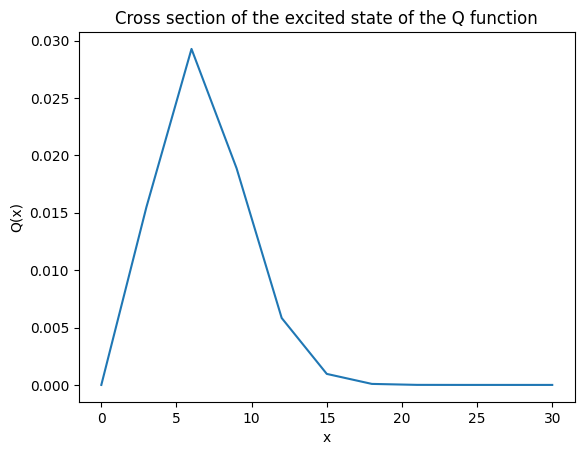

In [5]:
ux = np.linspace(0,30,x_dim)
uy = u[0,0]
fig, ax = plt.subplots()
ax.plot(ux, uy)
ax.set(xlabel='x', ylabel='Q(x)',title='Cross section of the excited state of the Q function')
plt.show()

In [6]:
print(f'Solution has converged: {u[0,0,5] == hushimi_1(0,5)}')

Solution has converged: True


So... the problem here is the following: As defined, the discretized form of the Husimi Q function only takes values corresponding to the positive semi-axes of the graph, meaning only positive x and y. For this reason, we only see one peak and not two. We therefore need to modify the program so that the value of the Husimi Q at 0 corresponds to the element $\frac{u.shape[1]}{2}$, meaning the middle of the matrix column.


In [7]:
print(f'Midpoint should be at: {u.shape[1] / 2}')

Midpoint should be at: 2.5


Another problem is that due to the factor $\frac{dx^4}{dx}$ in the discretized form of the Husimi Q, it is very sensitive to changes in $dx$. Therefore, this step must be chosen carefully, respecting the stability criteria of the solution, and we should continue building our code keeping this unchanged.

We see that the cross section of the Q function looks like the one we would expect from an oscillator in the ground state. Therefore, at least the results are logical...

In [8]:
for n in range(u.shape[0]-1):
    for i in range(u.shape[1]-1):
        for j in range(u.shape[2]-1):
            a = g*dt*(3-i-j-dA) #the constants
            b = g*dt*(i-dA)
            c = g*dt*(j-dA)
            d = g*dt*dA
            u[n+1,i,j] = a*u[n,i,j] + b*u[n,i+1,j] + c*u[n,i,j+1] + d*u[n,i+1,j+1]

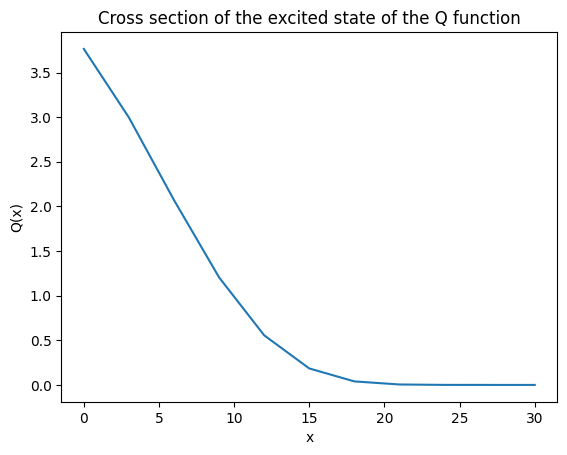

In [9]:
# Plot the final state
ux = np.linspace(0,30,x_dim)
uy = u[-1,0]
fig, ax = plt.subplots()
ax.plot(ux, uy)
ax.set(xlabel='x', ylabel='Q(x)',title='Cross section of the excited state of the Q function')
plt.show()

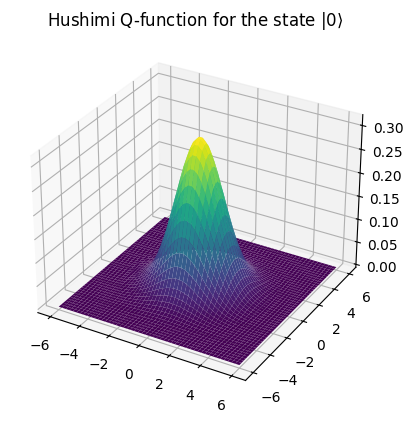

In [10]:
# Plot the actual Hushimi Q for the ground state

x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
X, Y = np.meshgrid(x, y)
Z = hushimi_0(X,Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title(r'Hushimi Q-function for the state $|0 \rangle$')
plt.show()

In [11]:
from qutip.ipynbtools import version_table
version_table()